In [1]:
#importing all datasets from Zara and connecting them.
import numpy as np
import pandas as pd
zara1=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_1.csv',header=0,sep=',')
zara2=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_2.csv',header=0,sep=',')
zara3=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_3.csv',header=0,sep=',')
zara4=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_4.csv',header=0,sep=',')
zara5=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_5.csv',header=0,sep=',')
zara6=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_6.csv',header=0,sep=',')
zara7=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_7.csv',header=0,sep=',')
zara8=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_8.csv',header=0,sep=',')
zara9=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_9.csv',header=0,sep=',')
zara10=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_10.csv',header=0,sep=',')
zara11=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_11.csv',header=0,sep=',')
zara12=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_12.csv',header=0,sep=',')


In [2]:
frames=[zara1,zara2,zara3,zara4,zara5,zara6,zara7,zara8,zara9,zara10,zara11,zara12]
zara=pd.concat(frames)
zara['date']=zara['date'].map(lambda x: x.rstrip('00:00:00+00:00'))
zara.dropna(axis=0,how='any',inplace=True)

In [3]:
del frames
del zara1,zara2,zara3,zara4,zara5,zara6,zara7,zara8,zara9,zara10,zara11,zara12

In [4]:
len(zara)

15027909

In [5]:
ref=zara.groupby('query').count().sort_values(['count'],ascending=False)


In [6]:
ref=ref[ref.index.map(len)>2] #dont want queries with fewer than  characters
ref=ref[ref['date']>367]

In [7]:
len(ref)

1031

In [8]:
zaraa=zara[zara['query']=='overalls']

In [9]:
zaraa=zaraa.rename(columns={'date':'ds','count':'y'})
zaraa['ds']=pd.to_datetime(zaraa['ds'])

In [10]:
import fbprophet
zaraa_prophet=fbprophet.Prophet(changepoint_prior_scale=0.05)
zaraa_prophet.fit(zaraa)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
zaraa_forecast=zaraa_prophet.make_future_dataframe(periods=60,freq='D')
zaraa_forecast=zaraa_prophet.predict(zaraa_forecast)

Text(0.5,1,'Searches over 2017 for OVERALLS')

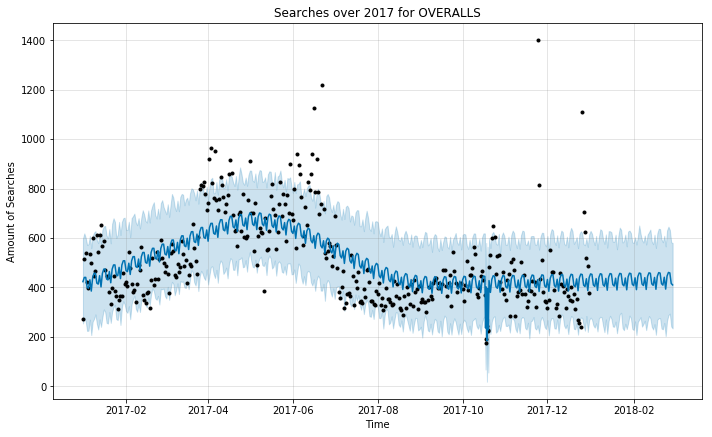

In [12]:
import matplotlib.pyplot as plt
zaraa_prophet.plot(zaraa_forecast,xlabel='Time',ylabel='Amount of Searches')
plt.title('Searches over 2017 for OVERALLS')

Text(0.5,1,'Overall, weekly and daily trends')

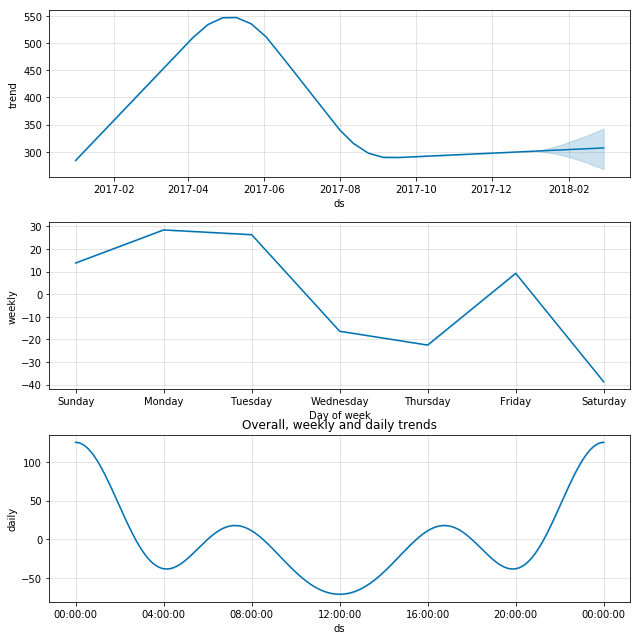

In [13]:
zaraa_prophet.plot_components(zaraa_forecast)
plt.title('Overall, weekly and daily trends')

In [14]:
#lets do the correlation dataframe:
flato=zara[zara['query']=='flat over']

In [15]:
qlist=ref.index.tolist()

In [41]:
#qlist=qlist[:10]

In [16]:
#index=flato['ds'].tolist()
#corrdf=pd.DataFrame(index=index, columns=qlist)
#corrdf=corrdf.fillna(0)#to have 0 rather than NAN

KeyError: 'ds'

In [237]:
#ref

,date,count
query,,
pumps,368,368
culotte,368,368
leather top,368,368
culottes,368,368
yellow bag,368,368
pullover,368,368
curve,368,368
leather skirt,368,368
cut out,368,368


In [18]:
df=pd.DataFrame()

In [20]:
df1=zara[zara['query']=='pumps']
#df2=zara[zara['query']=='culotte']
#df3=zara[zara['query']=='pipe']

In [204]:
#df1.drop('query',axis=1,inplace=True)
#df3.drop('query',axis=1,inplace=True)

/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df['date']=df1['date']

In [208]:
#df=df.merge(df3,on='date',how='left')
#df

,date,count_x,count_y,count_x,count_y,count
0,2017-01-01,73,107,107,107,NaN
1,2017-01-02,72,100,100,100,NaN
2,2017-01-03,55,86,86,86,1.0
3,2017-01-04,64,124,124,124,NaN
4,2017-01-05,62,138,138,138,2.0
5,2017-01-06,52,141,141,141,NaN
6,2017-01-07,44,99,99,99,3.0
7,2017-01-08,58,112,112,112,NaN
8,2017-01-09,34,161,161,161,NaN
9,2017-01-10,41,81,81,81,NaN


In [23]:
correlations=pd.DataFrame()
correlations['date']=df['date']
c=0
for i in qlist:
    hits=zara[zara['query']==i]
    hits.drop('query',axis=1,inplace=True)
    correlations=correlations.merge(hits,on='date',how='left')
    c+=1
correlations.fillna(0)

/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,count_x,count_y,count_x,count_y,count_x,count_y,count_x,count_y,count_x,...,count_y,count_x,count_y,count_x,count_y,count_x,count_y,count_x,count_y,count
0,2017-01-01,73,107,28,426,7,70,16,256,72,...,17,48,33,124,156,134,79,101,13,30
1,2017-01-02,72,100,35,381,7,111,4,334,68,...,37,66,26,273,176,147,39,152,27,25
2,2017-01-03,55,86,55,477,7,115,11,330,74,...,35,51,11,186,98,103,82,116,31,16
3,2017-01-04,64,124,32,488,2,71,1,335,74,...,19,49,10,106,58,79,49,68,28,25
4,2017-01-05,62,138,55,466,10,42,8,356,106,...,30,63,5,136,106,216,77,71,26,28
5,2017-01-06,52,141,51,496,5,183,17,411,69,...,26,43,34,276,81,164,100,97,24,43
6,2017-01-07,44,99,46,527,12,193,17,306,106,...,49,64,9,160,112,141,71,106,15,42
7,2017-01-08,58,112,45,531,5,68,7,241,116,...,22,64,22,74,98,58,67,100,17,32
8,2017-01-09,34,161,33,412,7,75,4,1003,71,...,16,38,13,113,80,110,42,164,13,11
9,2017-01-10,41,81,41,445,3,52,8,384,80,...,17,43,6,115,122,79,34,80,24,33


In [24]:
correlations.set_index('date', inplace=True)
correlations.columns=qlist

In [26]:
corr_matrix=correlations.corr()

In [27]:
corr_matrix.to_csv("/Users/empathybroker/Documents/TimeSeries/zara_dataset/correlation_matrix.csv")

In [51]:
names=corr_matrix.columns.values
high_corr=pd.DataFrame()
for col in corr_matrix.index:
    for row in corr_matrix.index:
        if corr_matrix[row][col]>0.7:
            high_corr['item1']=


ValueError: too many values to unpack (expected 2)

In [58]:
x=corr_matrix['pumps']['culottes']
x

0.012579937397588363

In [216]:
hits=hits.drop('query',axis=1,inplace=True)
hits

/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [217]:
hits

In [170]:
zaraa=zaraa.rename(columns={'ds':'date'})

In [173]:
flato.drop('query',axis=1,inplace=True)

/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
flato=flato.rename(columns={'ds':'date'})

In [181]:
df=df.merge(flato,on='date',how='left')

In [228]:
correlations

,date,count_x,count_y,count_x,count_y,count_x,count_y,count_x,count_y,count_x,...,count_y,count_x,count_y,count_x,count_y,count_x,count_y,count_x,count_y,count
0,2017-01-01,73,107,28,426,7,70,16,256,72,...,NaN,3.0,8.0,33.0,2.0,17.0,10.0,32.0,1.0,11.0
1,2017-01-02,72,100,35,381,7,111,4,334,68,...,1.0,1.0,8.0,22.0,2.0,8.0,6.0,55.0,4.0,24.0
2,2017-01-03,55,86,55,477,7,115,11,330,74,...,3.0,4.0,10.0,37.0,1.0,10.0,19.0,35.0,2.0,14.0
3,2017-01-04,64,124,32,488,2,71,1,335,74,...,2.0,1.0,17.0,16.0,NaN,16.0,16.0,33.0,4.0,8.0
4,2017-01-05,62,138,55,466,10,42,8,356,106,...,NaN,2.0,10.0,17.0,5.0,4.0,48.0,50.0,NaN,13.0
5,2017-01-06,52,141,51,496,5,183,17,411,69,...,1.0,NaN,7.0,32.0,2.0,6.0,25.0,71.0,4.0,10.0
6,2017-01-07,44,99,46,527,12,193,17,306,106,...,2.0,13.0,15.0,58.0,2.0,21.0,4.0,70.0,NaN,19.0
7,2017-01-08,58,112,45,531,5,68,7,241,116,...,2.0,7.0,5.0,28.0,5.0,10.0,41.0,66.0,1.0,13.0
8,2017-01-09,34,161,33,412,7,75,4,1003,71,...,NaN,3.0,11.0,16.0,4.0,2.0,24.0,22.0,2.0,12.0
9,2017-01-10,41,81,41,445,3,52,8,384,80,...,NaN,5.0,7.0,NaN,2.0,11.0,30.0,35.0,3.0,19.0


In [229]:
len(qlist)

14987

In [231]:
newref=ref[ref['count']>367]

In [232]:
len(newref)

1031